<a href="https://colab.research.google.com/github/geetha2601/Library-Catalog/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

Using TensorFlow backend.


In [0]:
import csv

def get_images(directory):
    Images = []
    Labels = []
    img = []
    label = 0
    
    with open(directory) as csv_file:
        
        csv_reader = csv.reader(csv_file, delimiter=',')
        for image,labels in csv_reader:
            if labels == 'Food':
                label = 0
            elif labels == 'Attire':
                label = 1
            elif labels == 'Decorationandsignage':
                label = 2
            elif labels == 'misc':
                label = 3
                
            imgs = image[5:-4]
            img.append(imgs)    
            Images.append(image)
            Labels.append(label)
    
    return (Images,Labels)

def get_classlabel(class_code):
    labels = {0:'Food', 1:'Attire', 2:'Decorationandsignage', 3:'misc'}
    
    return labels[class_code]

In [0]:
Images, Labels = get_images('train.csv') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [0]:
def get(directory):
    Labels1 = []
    Images1 = []
    
    for labels in os.listdir(directory): 
        res = int(np.where(Images == labels)[0])
        x = Labels[res]
        Labels1.append(x)
        
        image = cv2.imread(directory+r'/'+labels) 
        image = cv2.resize(image,(150,150)) 
        Images1.append(image)
        
    return shuffle(Labels1, Images1)

In [5]:
!unzip Test_Images.zip
!unzip Train_Images.zip

Streaming output truncated to the last 5000 lines.
  inflating: Train Images/image1842.jpg  
  inflating: Train Images/image1843.jpg  
  inflating: Train Images/image1844.jpg  
  inflating: Train Images/image1845.jpg  
  inflating: Train Images/image1849.jpg  
  inflating: Train Images/image1851.jpg  
  inflating: Train Images/image1852.jpg  
  inflating: Train Images/image1854.jpg  
  inflating: Train Images/image1859.jpg  
  inflating: Train Images/image186.jpg  
  inflating: Train Images/image1860.jpg  
  inflating: Train Images/image1861.jpg  
  inflating: Train Images/image1862.jpg  
  inflating: Train Images/image1863.jpg  
  inflating: Train Images/image1865.jpg  
  inflating: Train Images/image1868.jpg  
  inflating: Train Images/image187.jpg  
  inflating: Train Images/image1873.jpg  
  inflating: Train Images/image1875.jpg  
  inflating: Train Images/image1876.jpg  
  inflating: Train Images/image1878.jpg  
  inflating: Train Images/image1882.jpg  
  inflating: Train Images/i

In [5]:
Labels1, Images1 = get('Train Images')
Labels1 = np.array(Labels1)
Images1 = np.array(Images1)
print("Shape of Images:",Images1.shape)
print("Shape of Labels:",Labels1.shape)

Shape of Images: (5983, 150, 150, 3)
Shape of Labels: (5983,)


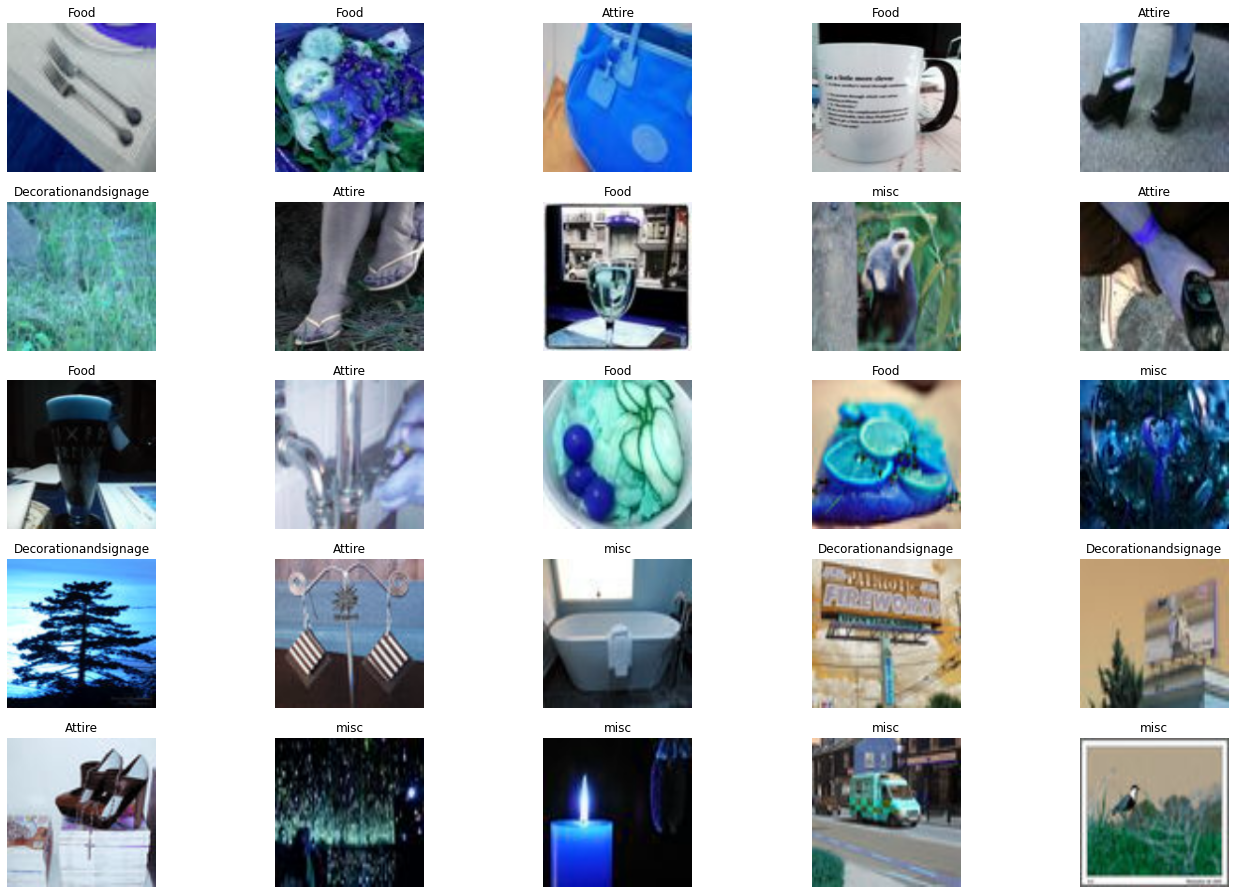

In [6]:
import matplotlib.pyplot as plt

f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images1))
        ax[i,j].imshow(Images1[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels1[rnd_number]))
        ax[i,j].axis('off')

In [0]:
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
x_train,x_val,y_train,y_val = train_test_split(Images1, Labels1,test_size = 0.3)
datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
datagen.fit(x_train)
datagen.fit(x_val)
y_train1 = []
y_val1 = []
for x in y_train:
  y_train1.append(get_classlabel(x))
for y in y_val:
  y_val1.append(get_classlabel(y))



optimizer - Adam lr = 0.0001, train_accuracy- 45, val_accuracy = 38


In [0]:
cnn4 = Models.Sequential()
cnn4.add(Layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150,150,3)))
cnn4.add(Layers.BatchNormalization())

cnn4.add(Layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(Layers.BatchNormalization())
cnn4.add(Layers.MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Layers.Dropout(0.35))

cnn4.add(Layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(Layers.BatchNormalization())
cnn4.add(Layers.MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Layers.Dropout(0.35))

cnn4.add(Layers.Flatten())

cnn4.add(Layers.Dense(128, activation='relu'))
cnn4.add(Layers.BatchNormalization())
cnn4.add(Layers.Dropout(0.5))

cnn4.add(Layers.Dense(4, activation='softmax'))

cnn4.compile(loss='sparse_categorical_crossentropy',
              optimizer=Optimizer.Adam(lr = 0.0001),
              metrics=['accuracy'])

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
early = EarlyStopping(patience=9)
hist = cnn4.fit_generator(datagen.flow(x_train, y_train, batch_size=32),steps_per_epoch=len(x_train) / 32, validation_data = datagen.flow(x_val, y_val, batch_size=32), validation_steps =len(x_val) / 32 ,epochs=40, callbacks = [early])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
131/130 [==============================] - 35s 267ms/step - loss: 1.7755 - accuracy: 0.3567 - val_loss: 11.3806 - val_accuracy: 0.2825
Epoch 2/40
131/130 [==============================] - 35s 264ms/step - loss: 1.6274 - accuracy: 0.3871 - val_loss: 20.7101 - val_accuracy: 0.2825
Epoch 3/40
131/130 [==============================] - 34s 260ms/step - loss: 1.5697 - accuracy: 0.3985 - val_loss: 26.7721 - val_accuracy: 0.2864
Epoch 4/40
131/130 [==============================] - 34s 261ms/step - loss: 1.5291 - accuracy: 0.4007 - val_loss: 36.1842 - val_accuracy: 0.2953
Epoch 5/40
131/130 [==============================] - 34s 260ms/step - loss: 1.4820 - accuracy: 0.4198 - val_loss: 28.8673 - val_accuracy: 0.3376
Epoch 6/40
131/130 [==============================] - 34s 259ms/step - loss: 1.4616 - accuracy: 0.4248 - val_loss: 30.8690 - val_accuracy: 0.3309
Epoch 7/40
131/130 [============================

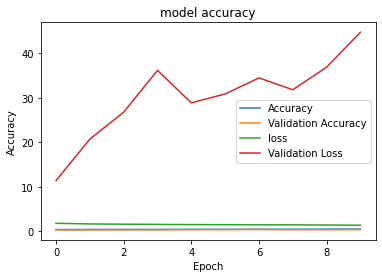

In [11]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

Optimizer - Adam lr - 0.005 train_accuracy - 55 val_accuracy - 54


In [0]:
model = Models.Sequential()
model.add(Layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150,150,3)))
model.add(Layers.BatchNormalization())
model.add(Layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Layers.BatchNormalization())
model.add(Layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Layers.Dropout(0.35))

model.add(Layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Layers.BatchNormalization())
model.add(Layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Layers.Dropout(0.35))

model.add(Layers.Flatten())

model.add(Layers.Dense(64, activation='relu'))
model.add(Layers.BatchNormalization())
model.add(Layers.Dropout(0.5))

model.add(Layers.Dense(4, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Optimizer.Adam(lr = 0.005),
              metrics=['accuracy'])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
early = EarlyStopping(patience=9)
his = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),steps_per_epoch=len(x_train) / 32, validation_data = datagen.flow(x_val, y_val, batch_size=32), validation_steps =len(x_val) / 32 ,epochs=40, callbacks = [early])

Epoch 1/40
131/130 [==============================] - 29s 219ms/step - loss: 1.4973 - accuracy: 0.3766 - val_loss: 1.5924 - val_accuracy: 0.3889
Epoch 2/40
131/130 [==============================] - 28s 215ms/step - loss: 1.2463 - accuracy: 0.4343 - val_loss: 1.1773 - val_accuracy: 0.4568
Epoch 3/40
131/130 [==============================] - 28s 215ms/step - loss: 1.1954 - accuracy: 0.4745 - val_loss: 1.1391 - val_accuracy: 0.4947
Epoch 4/40
131/130 [==============================] - 28s 215ms/step - loss: 1.1731 - accuracy: 0.4785 - val_loss: 1.3216 - val_accuracy: 0.4201
Epoch 5/40
131/130 [==============================] - 29s 218ms/step - loss: 1.1588 - accuracy: 0.4916 - val_loss: 1.2309 - val_accuracy: 0.4396
Epoch 6/40
131/130 [==============================] - 29s 218ms/step - loss: 1.1542 - accuracy: 0.4947 - val_loss: 1.1940 - val_accuracy: 0.4585
Epoch 7/40
131/130 [==============================] - 28s 216ms/step - loss: 1.1576 - accuracy: 0.4912 - val_loss: 1.2594 - val_ac

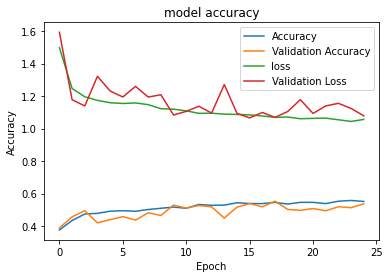

In [17]:
import matplotlib.pyplot as plt
plt.plot(his.history["accuracy"])
plt.plot(his.history['val_accuracy'])
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

Optimizer - SGD lr - 0.005 train_acc = 48 val_acc= 32

In [0]:
mode = Models.Sequential()
mode.add(Layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150,150,3)))
mode.add(Layers.BatchNormalization())
mode.add(Layers.MaxPooling2D(pool_size=(2, 2)))

mode.add(Layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
mode.add(Layers.BatchNormalization())
mode.add(Layers.MaxPooling2D(pool_size=(2, 2)))
mode.add(Layers.Dropout(0.35))

mode.add(Layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
mode.add(Layers.BatchNormalization())
mode.add(Layers.MaxPooling2D(pool_size=(2, 2)))
mode.add(Layers.Dropout(0.35))

mode.add(Layers.Flatten())

mode.add(Layers.Dense(64, activation='relu'))
mode.add(Layers.BatchNormalization())
mode.add(Layers.Dropout(0.5))

mode.add(Layers.Dense(4, activation='softmax'))

mode.compile(loss='sparse_categorical_crossentropy',
              optimizer=Optimizer.SGD(lr = 0.005),
              metrics=['accuracy'])

In [25]:
from tensorflow.keras.callbacks import EarlyStopping
early = EarlyStopping(patience=10)
hi = mode.fit_generator(datagen.flow(x_train, y_train, batch_size=32),steps_per_epoch=len(x_train) / 32, validation_data = datagen.flow(x_val, y_val, batch_size=32), validation_steps =len(x_val) / 32 ,epochs=40, callbacks = [early])

Epoch 1/40
131/130 [==============================] - 28s 217ms/step - loss: 1.7845 - accuracy: 0.3202 - val_loss: 1.5857 - val_accuracy: 0.3760
Epoch 2/40
131/130 [==============================] - 28s 217ms/step - loss: 1.5134 - accuracy: 0.3856 - val_loss: 2.8850 - val_accuracy: 0.3153
Epoch 3/40
131/130 [==============================] - 28s 214ms/step - loss: 1.3975 - accuracy: 0.4074 - val_loss: 4.3216 - val_accuracy: 0.3582
Epoch 4/40
131/130 [==============================] - 28s 213ms/step - loss: 1.3287 - accuracy: 0.4284 - val_loss: 6.3425 - val_accuracy: 0.3426
Epoch 5/40
131/130 [==============================] - 28s 213ms/step - loss: 1.2831 - accuracy: 0.4343 - val_loss: 6.2170 - val_accuracy: 0.3822
Epoch 6/40
131/130 [==============================] - 28s 212ms/step - loss: 1.2472 - accuracy: 0.4534 - val_loss: 12.0969 - val_accuracy: 0.3716
Epoch 7/40
131/130 [==============================] - 28s 214ms/step - loss: 1.1975 - accuracy: 0.4787 - val_loss: 17.3135 - val_

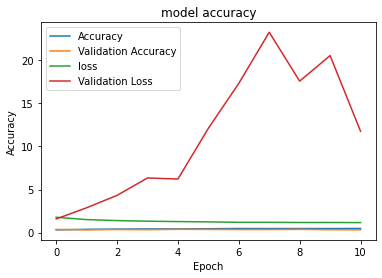

In [26]:
import matplotlib.pyplot as plt
plt.plot(hi.history["accuracy"])
plt.plot(hi.history['val_accuracy'])
plt.plot(hi.history['loss'])
plt.plot(hi.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [0]:
mod = Models.Sequential()
mod.add(Layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150,150,3)))
mod.add(Layers.BatchNormalization())
mod.add(Layers.MaxPooling2D(pool_size=(2, 2)))

mod.add(Layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
mod.add(Layers.BatchNormalization())
mod.add(Layers.MaxPooling2D(pool_size=(2, 2)))
mod.add(Layers.Dropout(0.35))

mod.add(Layers.Flatten())

mod.add(Layers.Dense(32, activation='relu'))
mod.add(Layers.BatchNormalization())
mod.add(Layers.Dropout(0.5))

mod.add(Layers.Dense(4, activation='softmax'))

mod.compile(loss='sparse_categorical_crossentropy',
              optimizer=Optimizer.Adam(lr = 0.005),
              metrics=['accuracy'])

In [29]:
from tensorflow.keras.callbacks import EarlyStopping
early = EarlyStopping(patience=10)
histr = mod.fit_generator(datagen.flow(x_train, y_train, batch_size=32),steps_per_epoch=len(x_train) / 32, validation_data = datagen.flow(x_val, y_val, batch_size=32), validation_steps =len(x_val) / 32 ,epochs=40, callbacks = [early])

Epoch 1/40
131/130 [==============================] - 28s 216ms/step - loss: 1.5069 - accuracy: 0.3835 - val_loss: 1.3093 - val_accuracy: 0.4078
Epoch 2/40
131/130 [==============================] - 28s 215ms/step - loss: 1.2253 - accuracy: 0.4377 - val_loss: 1.2944 - val_accuracy: 0.4540
Epoch 3/40
131/130 [==============================] - 28s 215ms/step - loss: 1.1946 - accuracy: 0.4644 - val_loss: 1.1622 - val_accuracy: 0.4869
Epoch 4/40
131/130 [==============================] - 29s 219ms/step - loss: 1.1834 - accuracy: 0.4742 - val_loss: 1.1667 - val_accuracy: 0.4741
Epoch 5/40
131/130 [==============================] - 29s 219ms/step - loss: 1.1691 - accuracy: 0.4764 - val_loss: 1.3067 - val_accuracy: 0.4061
Epoch 6/40
131/130 [==============================] - 29s 221ms/step - loss: 1.1682 - accuracy: 0.4749 - val_loss: 1.1901 - val_accuracy: 0.4613
Epoch 7/40
131/130 [==============================] - 28s 216ms/step - loss: 1.1450 - accuracy: 0.4900 - val_loss: 1.8182 - val_ac

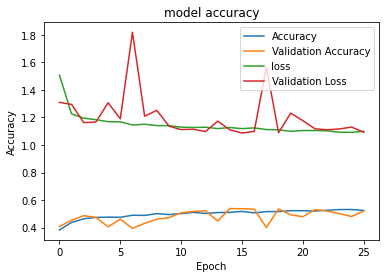

In [32]:
import matplotlib.pyplot as plt
plt.plot(histr.history["accuracy"])
plt.plot(histr.history['val_accuracy'])
plt.plot(histr.history['loss'])
plt.plot(histr.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [0]:

import tensorflow as tf
from tensorflow import keras

m = Models.Sequential()
m.add(Layers.Flatten(input_shape=(150,150,3)))
m.add(Layers.BatchNormalization())
m.add(Layers.Dense(4, kernel_regularizer=keras.regularizers.l2(0.02)))
m.add(Layers.BatchNormalization())
m.add(Layers.Activation('softmax'))

m.compile(Optimizer.Adam(lr=1e-5), 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
from tensorflow.keras.callbacks import EarlyStopping
early = EarlyStopping(patience=7)
h = m.fit_generator(datagen.flow(x_train, y_train, batch_size=32),steps_per_epoch=len(x_train) / 32, validation_data = datagen.flow(x_val, y_val, batch_size=32), validation_steps =len(x_val) / 32 ,epochs=25, callbacks = [early])

Epoch 1/25
131/130 [==============================] - 29s 223ms/step - loss: 1.6254 - accuracy: 0.2560 - val_loss: 1.5908 - val_accuracy: 0.2579
Epoch 2/25
131/130 [==============================] - 29s 221ms/step - loss: 1.5518 - accuracy: 0.2507 - val_loss: 1.5508 - val_accuracy: 0.2657
Epoch 3/25
131/130 [==============================] - 28s 216ms/step - loss: 1.5473 - accuracy: 0.2684 - val_loss: 1.5583 - val_accuracy: 0.2546
Epoch 4/25
131/130 [==============================] - 28s 216ms/step - loss: 1.5459 - accuracy: 0.2660 - val_loss: 1.5616 - val_accuracy: 0.2535
Epoch 5/25
131/130 [==============================] - 28s 214ms/step - loss: 1.5442 - accuracy: 0.2787 - val_loss: 1.5488 - val_accuracy: 0.2457
Epoch 6/25
131/130 [==============================] - 28s 216ms/step - loss: 1.5419 - accuracy: 0.2653 - val_loss: 1.5459 - val_accuracy: 0.2630
Epoch 7/25
131/130 [==============================] - 28s 216ms/step - loss: 1.5387 - accuracy: 0.2698 - val_loss: 1.5493 - val_ac